# Basic preparations

In this Notebook, the geofabric for the province of AB, Canada, is extracted from the `MERIT-Basins` dataset.

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import hydrant.topology.geom as gm

import subprocess
import os

Path definitions (system dependant - modify accordingly):

In [2]:
# geofabric paths
## merit-basins
mb_path = '/project/rpp-kshook/Model_Output/MERIT-Basins/MERIT_Hydro_v07_Basins_v01_bugfix1/pfaf_level_02/'
nc_path = '/project/rpp-kshook/Model_Output/MERIT-Basins/MERIT_Hydro_v07_Basins_v01_bugfix1/coastal_hillslopes'
## provincial boundaries
pv_file = 'lpr_000b16a_e'
pv_path = f'/project/rpp-kshook/Model_Output/canadian_cartographic_boundary/{pv_file}.zip'


# output paths
pv_out = './AB-provincial-boundaries/'
mb_out = './merit-basins-AB-boundaries/'

Extracting AB boundary polygon

In [3]:
subprocess.run(['unzip', pv_path, '-d', pv_out])

Archive:  /project/rpp-kshook/Model_Output/canadian_cartographic_boundary/lpr_000b16a_e.zip
  inflating: ./AB-provincial-boundaries/lpr_000b16a_e.dbf  
  inflating: ./AB-provincial-boundaries/lpr_000b16a_e.prj  
  inflating: ./AB-provincial-boundaries/lpr_000b16a_e.shp  
  inflating: ./AB-provincial-boundaries/lpr_000b16a_e.shx  
  inflating: ./AB-provincial-boundaries/province_territory.html  
  inflating: ./AB-provincial-boundaries/92-160-g2016002-eng.pdf  


CompletedProcess(args=['unzip', '/project/rpp-kshook/Model_Output/canadian_cartographic_boundary/lpr_000b16a_e.zip', '-d', './AB-provincial-boundaries/'], returncode=0)

# Reading Geofabric Dataset

## AB boundaries

In [4]:
provinces = gpd.read_file(os.path.join(pv_out, pv_file+'.shp'))

In [5]:
provinces

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((8307365.589 2582136.711, 83083..."
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((8435711.754 1679935.966, 84358..."
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"MULTIPOLYGON (((8470851.646 1624745.011, 84710..."
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((8176224.537 1722553.460, 81762..."
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((8399709.494 2261445.703, 84005..."
5,35,Ontario,Ontario,Ontario,Ont.,Ont.,"MULTIPOLYGON (((6378815.614 2295412.440, 63787..."
6,46,Manitoba,Manitoba,Manitoba,Man.,Man.,"MULTIPOLYGON (((6039656.509 2636304.343, 60396..."
7,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,"POLYGON ((5248633.914 2767057.263, 5249285.640..."
8,48,Alberta,Alberta,Alberta,Alta.,Alb.,"POLYGON ((5228304.177 2767597.891, 5228098.463..."
9,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.,"MULTIPOLYGON (((4018904.414 3410247.271, 40194..."


In [6]:
ab = provinces.loc[provinces.PRNAME == 'Alberta'].copy().to_crs(epsg=4326)

<AxesSubplot:>

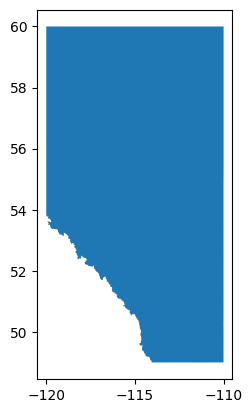

In [7]:
ab.plot()

## MERIT-Basins layers

Upon **visual** inspection, layers #71, #74, and #82 have sub-basins and river branches inside the boundary of the province of Alberta!

In [8]:
# file names
cat_files = ['cat_pfaf_71_MERIT_Hydro_v07_Basins_v01_bugfix1.shp',
             'cat_pfaf_74_MERIT_Hydro_v07_Basins_v01_bugfix1.shp',
             'cat_pfaf_82_MERIT_Hydro_v07_Basins_v01_bugfix1.shp',
            ]
riv_files = ['riv_pfaf_71_MERIT_Hydro_v07_Basins_v01_bugfix1.shp',
             'riv_pfaf_74_MERIT_Hydro_v07_Basins_v01_bugfix1.shp',
             'riv_pfaf_82_MERIT_Hydro_v07_Basins_v01_bugfix1.shp',
            ]
nca_files = ['hillslope_71_clean.shp',
             'hillslope_74_clean.shp',
             'hillslope_82_clean.shp',
            ]
# reading in data
cat = pd.concat([gpd.read_file(os.path.join(mb_path, f)) for f in cat_files])
riv = pd.concat([gpd.read_file(os.path.join(mb_path, f)) for f in riv_files])
nca = pd.concat([gpd.read_file(os.path.join(nc_path, f)) for f in nca_files])

In [9]:
cat.set_crs(epsg=4326, inplace=True)
nca.set_crs(epsg=4326, inplace=True)
riv.set_crs(epsg=4326, inplace=True)

,COMID,lengthkm,lengthdir,sinuosity,slope,uparea,order,strmDrop_t,slope_taud,NextDownID,maxup,up1,up2,up3,up4,geometry
0,71000001,7.020492,4.158236,1.688334,0.000570,391.901537,2,0.0,0.000000,71000065,2,71000095,71000213,0,0,"LINESTRING (-98.06167 60.00000, -98.06250 59.9..."
1,71000002,24.171249,15.709184,1.538670,0.000058,701.754912,2,1.4,0.000058,71000065,2,71000003,71000014,0,0,"LINESTRING (-98.06167 60.00000, -98.06083 60.0..."
2,71000003,14.760464,11.209022,1.316838,0.000770,480.760660,2,11.4,0.000770,71000002,2,71000004,71000011,0,0,"LINESTRING (-98.17250 60.13000, -98.17333 60.1..."
3,71000004,6.240078,4.631999,1.347168,0.000911,388.938962,2,5.7,0.000911,71000003,2,71000005,71000015,0,0,"LINESTRING (-98.33500 60.07000, -98.33583 60.0..."
4,71000005,4.462477,3.338111,1.336827,0.000670,328.557527,2,3.0,0.000670,71000004,2,71000006,71000012,0,0,"LINESTRING (-98.39917 60.09667, -98.40000 60.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43077,82043078,4.814190,3.918481,1.228586,0.011927,45.269134,1,57.5,0.011927,82042496,0,0,0,0,0,"LINESTRING (-118.11000 52.48667, -118.11000 52..."
43078,82043079,0.994277,0.739890,1.343818,0.048269,26.496361,1,48.1,0.048269,82042494,0,0,0,0,0,"LINESTRING (-117.65833 52.45500, -117.65750 52..."
43079,82043080,5.632788,4.310872,1.306647,0.009834,60.933375,1,55.5,0.009834,82042497,0,0,0,0,0,"LINESTRING (-117.81667 52.49000, -117.81750 52..."
43080,82043081,2.831781,2.045592,1.384333,0.063094,27.319907,1,178.9,0.063094,82042497,0,0,0,0,0,"LINESTRING (-117.81667 52.49000, -117.81750 52..."


# Preparing `cat`, `riv`, and `nca` objects for AB

## Preparing `catchments` and `rivers` from `MERIT-Basins`

In [10]:
catchments = gm.prepare_cat(cat=cat, cat_col_id='COMID', cst=nca, cst_col_mapper={'FID':'COMID'}, cst_col_id='COMID')

In [11]:
catchments

,COMID,unitarea,geometry,hillslope
0,71000001,39.620826,"POLYGON ((-98.14542 60.06375, -98.13792 60.063...",0
1,71000002,99.276774,"MULTIPOLYGON (((-98.11958 60.19292, -98.11458 ...",0
2,71000003,63.957629,"MULTIPOLYGON (((-98.33375 60.03542, -98.33292 ...",0
3,71000004,16.746171,"MULTIPOLYGON (((-98.40125 60.05208, -98.40042 ...",0
4,71000005,5.993164,"POLYGON ((-98.43208 60.10708, -98.43125 60.107...",0
...,...,...,...,...
169482,82047873,0.005895,"POLYGON ((-142.95208 70.07792, -142.95042 70.0...",1
169483,82047874,0.082522,"POLYGON ((-142.96208 70.08125, -142.95875 70.0...",1
169484,82047875,0.073671,"POLYGON ((-142.97375 70.08375, -142.96958 70.0...",1
169485,82047876,0.002947,"POLYGON ((-142.97625 70.08458, -142.97542 70.0...",1


In [12]:
rivers = gm.prepare_riv(riv=riv, riv_cols={'id':'COMID', 'next_id':'NextDownID', 'slope':'slope', 'length':'lengthkm', 'length_direct':'lengthdir'}, cat=catchments, cat_cols={'id':'COMID', 'hillslope':'hillslope', 'geom':'geometry'})

In [13]:
rivers

,COMID,lengthkm,lengthdir,sinuosity,slope,uparea,order,strmDrop_t,slope_taud,NextDownID,maxup,up1,up2,up3,up4,geometry,hillslope
0,71000001,7.020492,4.158236,1.688334,0.000570,391.901537,2,0.0,0.000000,71000065,2,71000095,71000213,0,0,"LINESTRING (-98.06167 60.00000, -98.06250 59.9...",0
1,71000002,24.171249,15.709184,1.538670,0.000058,701.754912,2,1.4,0.000058,71000065,2,71000003,71000014,0,0,"LINESTRING (-98.06167 60.00000, -98.06083 60.0...",0
2,71000003,14.760464,11.209022,1.316838,0.000770,480.760660,2,11.4,0.000770,71000002,2,71000004,71000011,0,0,"LINESTRING (-98.17250 60.13000, -98.17333 60.1...",0
3,71000004,6.240078,4.631999,1.347168,0.000911,388.938962,2,5.7,0.000911,71000003,2,71000005,71000015,0,0,"LINESTRING (-98.33500 60.07000, -98.33583 60.0...",0
4,71000005,4.462477,3.338111,1.336827,0.000670,328.557527,2,3.0,0.000670,71000004,2,71000006,71000012,0,0,"LINESTRING (-98.39917 60.09667, -98.40000 60.0...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169482,82047873,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.0,1.000000,-9999,1,1,1,1,1,None,1
169483,82047874,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.0,1.000000,-9999,1,1,1,1,1,None,1
169484,82047875,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.0,1.000000,-9999,1,1,1,1,1,None,1
169485,82047876,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.0,1.000000,-9999,1,1,1,1,1,None,1


## Subsetting AB portion

In [14]:
ab_catchments, ab_rivers = gm.intersect_topology(cat=catchments, cat_cols={'id':'COMID'}, riv=rivers, riv_cols={'id':'COMID', 'next_id':'NextDownID'}, shapefile=ab)

In [15]:
# saving data
ab_catchments.to_file('./merit-basins-AB-boundaries/ab_catchments.shp')
ab_rivers.to_file('./merit-basins-AB-boundaries/ab_rivers.shp')